In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import chi2
from scipy.stats import ncx2
from scipy.stats import norm as Gauss
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
from scipy import optimize

In [2]:
# Parameter
xname = r"$w_0$"
xname_hat = r"$\hat{w}_0$"
xname_true = r"$w_{0, \mathrm{true}}$"
x_true = -1.
x_lim = 1

# 2024_06_09_Wilks_varying_NP_w0_fld_-1.0
x_hat1 = np.array([-1.077936e+00, -8.840396e-01, -1.020063e+00, -7.632764e-01, -8.204425e-01, -1.095832e+00, -1.030206e+00, -6.862865e-01, -1.069823e+00, -9.391108e-01, -1.198918e+00, -7.807834e-01, -1.066068e+00, -1.041658e+00, -1.067424e+00, -9.769027e-01, -7.591470e-01, -7.091727e-01, -8.286874e-01, -1.069925e+00, -1.220916e+00, -5.533055e-01, -1.090535e+00, -8.645143e-01, -1.075532e+00, -1.049276e+00, -1.114244e+00, -7.276566e-01, -1.271518e+00, -8.797620e-01, -7.275339e-01, -1.083525e+00, -1.298906e+00, -9.941424e-01, -1.176540e+00, -7.261073e-01, -1.115972e+00, -7.762008e-01, -1.157264e+00, -1.200092e+00, -1.106879e+00, -8.756970e-01, -1.114287e+00, -1.042363e+00, -1.143246e+00, -1.011682e+00, -9.121284e-01, -7.210687e-01, -1.107029e+00, -1.207777e+00, -7.801401e-01, -1.210978e+00, -8.433734e-01, -1.200410e+00, -5.507016e-01, -1.068820e+00, -8.683591e-01, -9.742763e-01, -1.074314e+00, -8.115312e-01, -9.953063e-01, -7.095717e-01, -7.357807e-01, -8.524273e-01, -1.323350e+00, -1.244501e+00, -9.163602e-01, -1.193699e+00, -1.049302e+00, -8.237779e-01, -5.571376e-01, -6.543428e-01, -1.057128e+00, -7.460586e-01, -1.184918e+00, -7.770058e-01, -1.094755e+00, -1.082752e+00, -7.795099e-01, -9.074038e-01, -9.361916e-01, -7.976060e-01, -7.277199e-01, -1.356316e+00, -7.803775e-01, -1.083049e+00, -1.199562e+00, -6.078420e-01, -7.210102e-01, -1.034187e+00, -1.129119e+00, -1.248251e+00, -1.134446e+00, -7.621112e-01, -9.722149e-01, -1.281546e+00, -6.373805e-01, -1.016148e+00, -1.199248e+00, -8.134414e-01])
lnL_hat1 = -np.array([332.76, 301.39, 282.26, 345.93, 304.42, 296.71, 290.28, 300.38, 299.92, 331.94, 302.31, 330.35, 305.06, 331.12, 307.41, 323.13, 291.18, 281.50, 313.10, 299.30, 317.33, 298.51, 273.26, 322.19, 330.01, 338.06, 306.29, 299.67, 288.00, 299.78, 303.95, 302.55, 298.72, 279.35, 303.88, 299.18, 292.36, 284.76, 308.32, 317.00, 301.27, 321.05, 290.93, 297.06, 303.94, 303.67, 328.06, 308.96, 298.79, 306.66, 299.86, 329.96, 281.42, 283.27, 295.20, 302.98, 285.28, 297.20, 311.90, 312.02, 315.00, 305.39, 323.38, 301.07, 287.31, 308.79, 292.97, 286.33, 306.41, 284.53, 308.30, 295.04, 315.71, 312.51, 305.40, 313.54, 297.62, 287.81, 318.68, 269.73, 304.36, 268.01, 303.61, 290.83, 329.93, 321.90, 307.67, 279.22, 321.43, 297.92, 333.92, 319.64, 298.52, 292.54, 307.65, 294.92, 267.72, 298.34, 315.98, 290.88])
lnL_tru1 = -np.array([333.43, 301.46, 282.30, 346.20, 304.53, 296.79, 290.32, 300.83, 299.97, 331.96, 302.65, 330.51, 305.27, 331.25, 307.61, 323.30, 291.56, 281.88, 313.25, 299.34, 317.85, 300.39, 273.33, 322.25, 330.09, 338.09, 306.44, 299.94, 288.27, 299.85, 304.75, 302.69, 299.15, 279.41, 304.05, 299.47, 292.43, 284.98, 308.59, 317.18, 301.71, 321.09, 291.08, 297.25, 304.05, 303.89, 328.40, 309.36, 298.97, 307.09, 300.29, 330.45, 281.50, 283.55, 298.02, 303.10, 285.41, 297.22, 311.93, 312.14, 315.02, 305.98, 324.45, 301.16, 288.19, 309.33, 292.99, 286.61, 306.66, 284.76, 311.05, 295.81, 315.74, 312.77, 305.75, 313.72, 297.65, 287.87, 318.89, 269.75, 304.38, 268.14, 303.92, 292.24, 330.29, 321.95, 307.98, 280.87, 322.14, 298.01, 334.02, 320.19, 298.63, 292.86, 307.69, 295.29, 268.93, 298.43, 316.21, 291.12])

# 2024_06_14_Wilks_varying_NP_w0_fld_-1.0
x_hat2 = np.array([-1.088122e+00, -8.811407e-01, -1.020376e+00, -7.624655e-01, -8.208066e-01, -1.194741e+00, -1.029947e+00, -6.746974e-01, -1.193771e+00, -9.288114e-01, -1.274966e+00, -7.733912e-01, -1.081746e+00, -1.043853e+00, -1.103707e+00, -9.331064e-01, -6.817349e-01, -6.802525e-01, -8.153497e-01, -1.127113e+00, -1.300528e+00, -4.990420e-01, -1.185541e+00, -8.969103e-01, -1.135370e+00, -1.039160e+00, -1.208660e+00, -7.104859e-01, -1.360690e+00, -8.666739e-01, -6.697710e-01, -1.165636e+00, -1.349920e+00, -9.363744e-01, -1.214200e+00, -6.990471e-01, -1.147883e+00, -7.278584e-01, -1.241870e+00, -1.235511e+00, -1.194773e+00, -8.860961e-01, -1.142692e+00, -1.081874e+00, -1.224905e+00, -1.069833e+00, -9.127270e-01, -6.784144e-01, -1.211381e+00, -1.328812e+00, -7.416900e-01, -1.307440e+00, -8.109534e-01, -1.269716e+00, -4.790437e-01, -1.109837e+00, -8.036080e-01, -9.199698e-01, -1.012894e+00, -8.114512e-01, -1.016151e+00, -6.650939e-01, -6.457697e-01, -8.459015e-01, -1.410792e+00, -1.339006e+00, -9.416353e-01, -1.251971e+00, -1.071514e+00, -7.473886e-01, -4.812291e-01, -6.232417e-01, -1.071922e+00, -7.256737e-01, -1.247176e+00, -7.560656e-01, -1.095224e+00, -1.087601e+00, -7.385080e-01, -9.085222e-01, -9.504757e-01, -7.991565e-01, -7.233991e-01, -1.482450e+00, -7.456925e-01, -1.146299e+00, -1.260529e+00, -5.041041e-01, -6.298877e-01, -1.076361e+00, -1.154217e+00, -1.334605e+00, -1.196995e+00, -6.841972e-01, -9.942394e-01, -1.341950e+00, -5.363949e-01, -1.084461e+00, -1.255012e+00, -7.824047e-01])
lnL_hat2 = -np.array([332.76, 301.39, 282.26, 345.93, 400.00, 296.68, 400.00, 300.37, 299.88, 331.94, 302.23, 330.35, 305.05, 331.11, 307.42, 323.13, 291.12, 281.48, 313.10, 299.30, 317.22, 298.31, 273.25, 322.19, 329.99, 338.06, 306.23, 299.66, 287.95, 299.78, 303.80, 302.48, 298.69, 279.35, 303.84, 299.16, 292.36, 284.74, 308.23, 316.98, 301.16, 321.05, 290.92, 297.04, 303.90, 303.66, 328.06, 308.94, 298.69, 306.52, 299.83, 329.81, 400.00, 283.22, 294.40, 302.96, 285.19, 400.00, 311.90, 312.02, 315.00, 305.34, 323.11, 301.07, 287.22, 308.66, 292.97, 286.27, 306.41, 284.47, 307.86, 294.99, 315.71, 312.50, 305.33, 313.53, 297.62, 287.81, 318.66, 269.73, 304.36, 268.00, 303.61, 290.69, 329.90, 321.90, 307.63, 278.81, 321.24, 297.92, 333.91, 319.53, 298.49, 292.51, 307.65, 294.88, 267.52, 298.33, 315.94, 290.88])
lnL_tru2 = -np.array([332.90, 301.44, 282.27, 346.13, 304.51, 296.77, 290.29, 300.77, 299.95, 331.96, 302.64, 330.51, 305.09, 331.13, 307.44, 323.14, 291.54, 281.85, 313.19, 299.33, 317.84, 300.39, 273.31, 322.23, 330.07, 338.08, 306.41, 299.94, 288.26, 299.81, 304.66, 302.64, 299.05, 279.36, 304.04, 299.45, 292.42, 284.97, 308.56, 317.19, 301.44, 321.08, 290.98, 297.09, 304.04, 303.68, 328.09, 309.33, 298.91, 307.06, 300.10, 330.44, 281.49, 283.54, 298.02, 303.04, 285.35, 297.21, 311.92, 312.12, 315.01, 305.97, 324.15, 301.14, 287.94, 309.26, 292.98, 286.59, 306.44, 284.74, 310.75, 295.81, 315.73, 312.76, 305.73, 313.72, 297.64, 287.83, 318.89, 269.74, 304.37, 268.13, 303.84, 291.55, 330.13, 321.94, 307.94, 280.84, 322.10, 297.94, 334.02, 320.08, 298.61, 292.84, 307.66, 295.22, 268.90, 298.35, 316.17, 291.01])

# 2024_06_16_Wilks_varying_NP_w0_fld_-1.0 
x_hat3 = np.array([-1.149639e+00, -8.805779e-01, -1.003026e+00, -7.622437e-01, -8.201033e-01, -1.216515e+00, -1.030609e+00, -6.765175e-01, -1.187745e+00, -9.301184e-01, -1.318194e+00, -7.754143e-01, -1.127245e+00, -1.040895e+00, -1.108171e+00, -9.387576e-01, -6.825653e-01, -6.712589e-01, -8.096122e-01, -1.131458e+00, -1.376631e+00, -4.922719e-01, -1.216249e+00, -8.993579e-01, -1.192540e+00, -1.040584e+00, -1.233133e+00, -7.072552e-01, -1.450557e+00, -8.836483e-01, -6.381167e-01, -1.196286e+00, -1.408467e+00, -9.369931e-01, -1.270846e+00, -6.980719e-01, -1.172702e+00, -7.282568e-01, -1.272770e+00, -1.257753e+00, -1.207188e+00, -8.856436e-01, -1.156470e+00, -1.137089e+00, -1.258247e+00, -1.072819e+00, -9.093633e-01, -6.588283e-01, -1.238151e+00, -1.424655e+00, -7.353270e-01, -1.360804e+00, -8.149192e-01, -1.327269e+00, -4.503585e-01, -1.171189e+00, -8.161849e-01, -9.201268e-01, -1.013046e+00, -8.110369e-01, -1.058546e+00, -6.139538e-01, -5.702226e-01, -8.101261e-01, -1.456788e+00, -1.370111e+00, -9.129889e-01, -1.343817e+00, -1.083150e+00, -7.231581e-01, -4.733389e-01, -5.968879e-01, -1.115182e+00, -6.977640e-01, -1.300014e+00, -7.278947e-01, -1.096073e+00, -1.085687e+00, -7.381157e-01, -9.256443e-01, -9.421835e-01, -7.946504e-01, -7.037888e-01, -1.567200e+00, -7.347696e-01, -1.143757e+00, -1.309541e+00, -4.957351e-01, -6.121791e-01, -1.076399e+00, -1.215007e+00, -1.358119e+00, -1.229794e+00, -6.864266e-01, -9.945600e-01, -1.460985e+00, -5.176038e-01, -1.076556e+00, -1.328451e+00, -7.983849e-01])
lnL_hat3 = -np.array([332.74, 301.39, 400.00, 345.93, 304.42, 296.69, 290.28, 300.37, 299.88, 331.94, 302.19, 330.34, 305.05, 331.11, 307.41, 323.13, 291.12, 281.48, 313.10, 299.30, 317.11, 298.27, 273.25, 322.19, 329.98, 338.06, 306.21, 299.66, 287.93, 299.78, 303.75, 302.46, 298.67, 279.35, 303.82, 299.16, 292.36, 284.74, 308.19, 316.96, 301.14, 321.05, 290.92, 297.03, 303.90, 303.66, 328.06, 308.94, 298.68, 306.44, 299.83, 329.75, 281.42, 283.18, 294.17, 302.94, 285.26, 297.20, 311.91, 312.02, 314.99, 305.31, 322.96, 301.07, 287.18, 308.63, 292.97, 286.22, 306.41, 284.46, 307.65, 294.96, 315.70, 312.50, 305.27, 313.53, 297.62, 287.81, 318.66, 269.73, 304.36, 268.00, 400.00, 290.62, 329.91, 321.90, 307.60, 278.78, 321.20, 297.92, 333.89, 319.52, 298.49, 400.00, 307.65, 294.82, 267.51, 298.33, 315.91, 400.00])
lnL_tru3 = -np.array([332.81, 301.44, 282.27, 346.13, 304.51, 296.77, 290.29, 300.76, 299.95, 331.96, 302.64, 330.50, 305.09, 331.14, 307.43, 323.14, 291.54, 281.85, 313.19, 299.32, 317.84, 300.39, 273.31, 322.23, 330.06, 338.09, 306.41, 299.94, 288.26, 299.81, 304.65, 302.64, 299.05, 279.36, 304.04, 299.45, 292.42, 284.97, 308.56, 317.18, 301.43, 321.08, 290.97, 297.09, 304.04, 303.68, 328.08, 309.34, 298.92, 307.06, 300.10, 330.45, 281.49, 283.54, 298.02, 303.05, 285.35, 297.21, 311.91, 312.11, 315.01, 305.96, 324.12, 301.14, 287.94, 309.26, 292.99, 286.59, 306.43, 284.74, 310.74, 295.80, 315.73, 312.76, 305.73, 313.72, 297.64, 287.84, 318.88, 269.75, 304.37, 268.13, 303.84, 291.55, 330.13, 321.94, 307.94, 280.84, 322.11, 297.93, 334.02, 320.08, 298.61, 292.84, 307.66, 295.23, 268.90, 298.35, 316.18, 291.00])

# 2024_08_04_Wilks_varying_NP_w0_fld_-1.0
x_hat4 = np.array([-1.192549e+00, -8.519328e-01, -9.888633e-01, -7.622437e-01, -8.235587e-01, -1.123833e+00, -9.975742e-01, -7.142546e-01, -1.080419e+00, -9.304803e-01, -1.348270e+00, -7.740245e-01, -1.144776e+00, -1.040895e+00, -1.050870e+00, -9.384780e-01, -7.510978e-01, -7.217249e-01, -8.432073e-01, -1.068046e+00, -1.400891e+00, -4.710479e-01, -1.220569e+00, -8.993579e-01, -1.096234e+00, -1.042717e+00, -1.121149e+00, -7.209708e-01, -1.304435e+00, -8.695684e-01, -5.897675e-01, -1.228707e+00, -1.470511e+00, -9.369931e-01, -1.253369e+00, -7.021450e-01, -1.089961e+00, -7.684521e-01, -1.173119e+00, -1.174282e+00, -1.223705e+00, -8.903601e-01, -1.209248e+00, -1.137089e+00, -1.145712e+00, -1.050266e+00, -9.384706e-01, -7.548799e-01, -1.125791e+00, -1.252518e+00, -7.434029e-01, -1.396669e+00, -8.384416e-01, -1.327269e+00, -5.672368e-01, -1.098353e+00, -8.680201e-01, -9.550949e-01, -1.048842e+00, -8.458915e-01, -1.080186e+00, -6.154201e-01, -5.594207e-01, -8.101261e-01, -1.310451e+00, -1.190963e+00, -9.454009e-01, -1.195724e+00, -1.115967e+00, -8.210253e-01, -4.398364e-01, -5.791316e-01, -1.162510e+00, -6.977640e-01, 1, 1, 1, -1.060598e+00, -7.894158e-01, -9.201654e-01, -9.477539e-01, -8.050720e-01, -7.280579e-01, -1.567200e+00, 1, 1, 1, -6.317659e-01, -7.023580e-01, -1.083487e+00, -1.253031e+00, -1.402865e+00, -1.258104e+00, -6.864266e-01, 1, 1, 1, -1.055890e+00, -1.195095e+00, -8.077149e-01, -5.897936e-01, -7.986220e-01, -1.039734e+00, 7.638474e+00, -9.842959e-01, -1.068651e+00, -1.198503e+00, -1.217246e+00, -6.428374e-01, -1.154766e+00, -1.023154e+00, -1.069848e+00, -7.196977e-01, 7.659531e+00, 1, -1.307236e+00, -1.276477e+00, -9.029573e-01, 7.670761e+00, 1, -1.173972e+00, -9.681395e-01, -1.304080e+00, 7.691818e+00, 1, -6.537930e-01, -7.481723e-01, -1.113546e+00, 7.696030e+00, 1, -8.528401e-01, -8.177177e-01, -6.562028e-01, 7.667252e+00, 1, -1.091981e+00, -1.172738e+00, -7.122063e-01, 7.645493e+00, 1, -1.102563e+00, -7.119752e-01, -1.213321e+00, 7.611801e+00, 1, -1.137257e+00, -1.226046e+00, -8.208818e-01, 7.695328e+00, 1, -1.148868e+00, -7.647366e-01, -1.094283e+00, 7.741653e+00, 1, 1, -1.198292e+00, -1.246461e+00, -8.204846e-01, 7.639175e+00, -1.093212e+00, -6.553768e-01, -7.298188e-01, 7.689011e+00, 1, -5.536139e-01, -1.150874e+00, -7.661996e-01, 7.603378e+00, 1, -1.089863e+00, -1.185134e+00, -6.266918e-01, 7.688309e+00, 1, -1.133855e+00, -1.123398e+00, -6.487528e-01, 7.708664e+00, 1, -7.156756e-01, -9.912904e-01, -8.281293e-01, 7.657425e+00, 1, -6.132431e-01, -1.085243e+00, -1.150019e+00, 7.659531e+00, 1, -6.421708e-01, -9.434787e-01, -1.298941e+00, 7.667953e+00, 1, -8.690372e-01, -9.407336e-01, -9.434639e-01, 7.603378e+00, 1]) 
lnL_hat4 = -np.array([332.74, 301.29, 282.28, 400, 304.51, 296.66, 290.19, 300.48, 299.81, 400, 301.96, 330.69, 305.32, 400, 307.37, 400, 291.34, 281.53, 313.37, 299.32, 317.25, 298.41, 400, 400, 330.09, 338.22, 306.37, 299.69, 288.04, 299.97, 303.67, 302.52, 298.77, 400, 303.81, 299.22, 292.36, 284.71, 308.31, 316.80, 301.30, 321.03, 290.95, 400, 304.10, 303.80, 327.99, 308.85, 298.72, 306.60, 299.87, 329.59, 281.33, 400, 295.28, 302.94, 285.24, 297.20, 311.70, 312.11, 315.09, 305.38, 322.89, 400, 287.51, 308.92, 400, 286.21, 306.64, 284.43, 307.55, 294.90, 315.62, 400, 400, 400, 400, 287.77, 318.48, 269.83, 304.35, 268.21, 303.47, 400, 400, 400, 400, 279.36, 321.39, 400, 333.96, 319.52, 298.46, 400, 400, 400, 400, 298.17, 316.17, 290.69, 298.53, 295.75, 309.84, 400, 304.28, 292.17, 318.79, 336.54, 284.87, 290.80, 400, 292.92, 285.27, 400, 400, 293.64, 309.12, 305.58, 400, 400, 312.78, 274.12, 327.24, 400, 400, 295.27, 283.57, 297.87, 400, 400, 309.91, 292.20, 308.30, 400, 400, 294.25, 286.21, 284.74, 400, 400, 300.21, 292.95, 302.89, 400, 400, 284.56, 289.43, 299.37, 400, 400, 306.39, 302.31, 290.92, 400, 400, 400, 275.95, 294.79, 269.87, 400, 312.21, 306.70, 311.72, 400, 400, 280.04, 290.15, 306.65, 400, 400, 315.00, 310.02, 283.03, 400, 400, 320.51, 315.71, 317.70, 400, 400, 258.44, 303.09, 316.71, 400, 400, 288.80, 273.18, 300.38, 400, 400, 304.97, 320.44, 338.11, 400, 400, 322.80, 342.09, 292.97, 400, 400])
lnL_tru4 = -np.array([332.83, 301.34, 282.29, 346.31, 304.67, 296.73, 290.22, 300.88, 299.88, 331.74, 302.43, 330.83, 305.36, 331.23, 307.52, 323.17, 291.87, 281.88, 313.47, 299.36, 318.03, 300.54, 273.31, 322.36, 330.20, 338.27, 306.50, 299.98, 288.35, 300.11, 304.66, 302.74, 299.18, 279.47, 304.02, 299.50, 292.56, 284.94, 308.58, 316.98, 301.60, 321.06, 291.01, 297.15, 304.21, 303.85, 328.08, 309.21, 298.89, 307.16, 300.14, 330.35, 281.40, 283.51, 297.96, 303.05, 285.38, 297.22, 311.72, 312.20, 315.10, 306.02, 324.07, 301.32, 288.18, 309.32, 292.87, 286.50, 306.67, 284.87, 310.69, 295.74, 315.65, 312.86, 400, 400, 400, 287.81, 318.70, 269.86, 304.36, 268.33, 303.71, 291.69, 400, 400, 400, 280.92, 322.20, 297.84, 334.11, 320.14, 298.59, 292.77, 400, 400, 400, 298.23, 316.39, 291.00, 300.36, 295.86, 310.10, 313.74, 304.32, 292.61, 319.13, 336.83, 285.51, 290.95, 285.74, 292.98, 285.58, 304.67, 400, 294.09, 309.73, 305.80, 332.71, 400, 313.22, 274.12, 327.70, 297.53, 400, 296.08, 284.04, 297.93, 301.77, 400, 309.96, 292.36, 309.25, 258.99, 400, 294.40, 286.60, 285.46, 310.55, 400, 300.38, 293.44, 302.97, 280.89, 400, 284.83, 289.86, 299.52, 309.36, 400, 306.50, 302.61, 290.95, 257.05, 400, 400, 276.24, 294.96, 270.02, 301.19, 312.30, 307.90, 312.20, 344.42, 400, 282.38, 290.19, 307.00, 330.83, 400, 315.06, 310.41, 284.20, 271.65, 400, 320.60, 316.05, 318.48, 272.95, 400, 258.77, 303.14, 316.76, 299.10, 400, 289.62, 273.28, 300.42, 287.59, 400, 307.08, 320.56, 338.86, 294.83, 400, 322.85, 342.14, 293.50, 277.69, 400]) 

# Asimov data set
xs_asimov   =   np.array([   -1.7,  -1.6,  -1.5, -1.4, -1.3, -1.2, -1.1, -1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.35])
chi2_asimov1 = 2*np.array([ 10.26,   1.78,  0.16, 0.12, 0.08, 0.04, 0.01, 0.00, 0.02, 0.10, 0.29, 0.68, 1.50, 3.17,  4.63]) # too tight range at very negative w0
chi2_asimov2 = 2*np.array([  0.26,   0.20,  0.27, 0.13, 0.09, 0.11, 0.04, 0.67, 0.80, 0.39, 0.62, 1.41, 1.92, 4.18,  5.92])
chi2_asimov = np.minimum(chi2_asimov1, chi2_asimov2)

# Remove failed minimizations
x_hat100 = x_hat4[100:]
lnL_hat100 = lnL_hat4[100:]
lnL_tru100 = lnL_tru4[100:]
index = np.nonzero(lnL_hat100>-400)
lnL_hat100 = lnL_hat100[(index)]
lnL_tru100 = lnL_tru100[(index)]
x_hat100 = x_hat100[(index)]

# Combine
lnL_hat12 = np.maximum(lnL_hat1, lnL_hat2)
lnL_hat34 = np.maximum(lnL_hat3, lnL_hat4[:100])
lnL_hat = np.append(np.maximum(lnL_hat12, lnL_hat34), lnL_hat100)
x_hat12 = np.where(lnL_hat1>lnL_hat2, x_hat1, x_hat2)
x_hat34 = np.where(lnL_hat3>lnL_hat4[:100], x_hat3, x_hat4[:100])
x_hat = np.append(np.where(lnL_hat12>lnL_hat34, x_hat12, x_hat34[:100]), x_hat100)
lnL_tru = np.append(np.maximum(np.maximum(lnL_tru1, lnL_tru2), np.maximum(lnL_tru4[:100], lnL_tru3)), lnL_tru100)

# Compute likelihood ratio
LR = -2*(lnL_tru - lnL_hat)
LR4 = -2*(lnL_tru4 - lnL_hat4)
print("max LR: ", np.max(LR))

max LR:  7.579999999999927


In [4]:
# histogram settings
bin_width = 0.5
bin_max = 12
bins = np.arange(0, bin_max, bin_width)
bins_fine = np.arange(0, bin_max, bin_width/10.)
N_LR = len(LR)
nbins = len(bins)
norm = bin_width*N_LR

# x settings
x_bin_width = 0.09
x_bins = np.arange(x_true-x_lim, x_true+x_lim, x_bin_width)
x_bins_fine = np.arange(x_true-x_lim, x_true+x_lim, x_bin_width/10.)
norm_x = x_bin_width*N_LR

In [5]:
# Set fonts
plt.rc('font',**{'family':'Helvetica','size':16})
plt.rc('text', usetex=True)
font = {'family':'Helvetica',
        'color' : 'black',
        'size'  :  16}

In [6]:
# Define a parabola
def parab(x, a,b,c):
    return a + b * (x-c)**2.

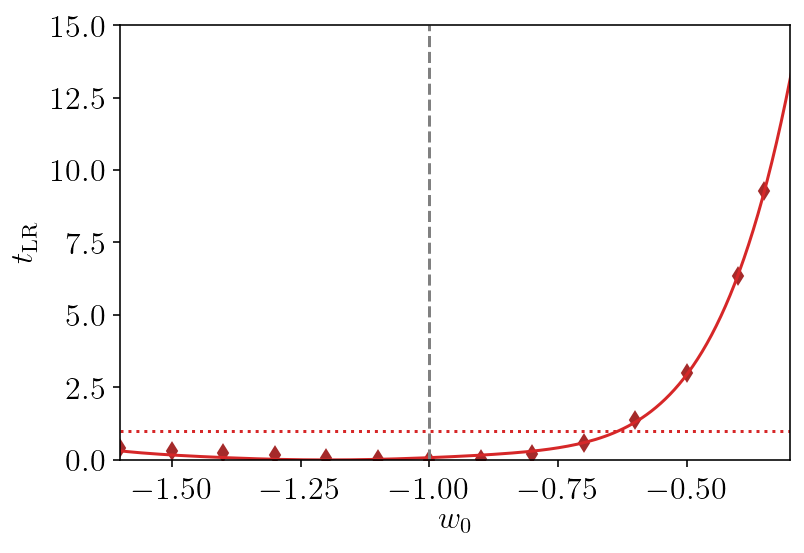

In [7]:
#### Fit higher order polynomial
# Define higher order polynomial
def poly(x,b,c,d,e):
    return b * (x-c)**2. + d * (x-c)**4. + e * (x-c)**6.

#Fit higher order polynomial
[b,c,d,e], pcov = curve_fit(poly, xs_asimov, chi2_asimov, p0=[31, -1, -246, 573], maxfev=30000)
polyfit_x = x_bins_fine
polyfit_y = b * (polyfit_x-c)**2. + d * (polyfit_x-c)**4. + e * (polyfit_x-c)**6.

# Plot
plt.plot(xs_asimov, chi2_asimov, marker="d", ls="", color="brown")
plt.plot(polyfit_x, polyfit_y, color='tab:red', ls='-')
plt.axvline(x_true, color="grey", ls="--")
plt.axhline(1, color="tab:red", ls=":")
plt.ylabel(r"$t_\mathrm{LR}$")
plt.xlabel(xname)
plt.ylim([0,15])
plt.xlim([-1.6, -0.3])
plt.show()

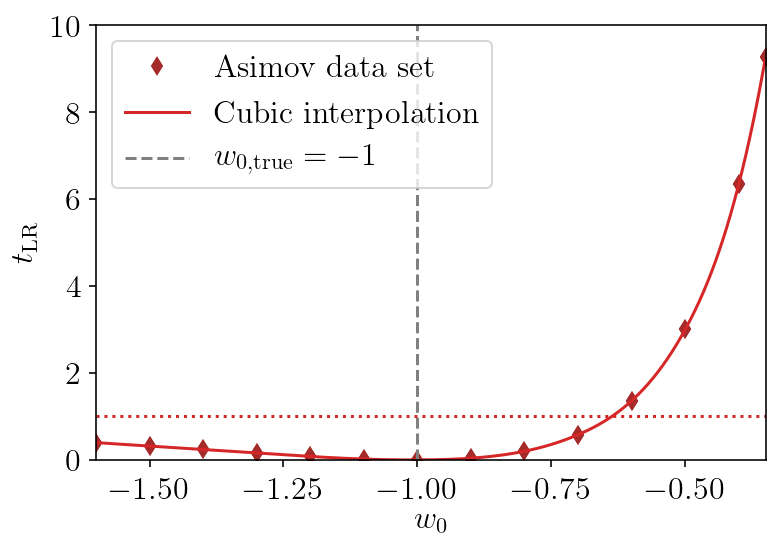

In [8]:
#### Interpolate between points
chi2_x = interp1d(xs_asimov, chi2_asimov, kind='cubic')
xrange = np.arange(-1.7, -0.35, 0.001)

# Plot
plt.plot(xs_asimov, chi2_asimov, marker="d", ls="", color="brown", fillstyle='none')
plt.plot(xs_asimov, chi2_asimov, marker="d", ls="", color="brown", label="Asimov data set")
plt.plot(xrange, chi2_x(xrange), color="tab:red", label="Cubic interpolation")
plt.axvline(x_true, color="grey", ls="--", label=r"$w_{0,\mathrm{true}} = -1$")
plt.axhline(1, color="tab:red", ls=":")
plt.ylabel(r"$t_\mathrm{LR}$")
plt.xlabel(xname)
plt.ylim([0,10])
plt.xlim([-1.6, -0.35])
plt.legend(loc="upper left")
plt.savefig("PL_asimov_w0.pdf", format="PDF", bbox_inches='tight')
plt.show()

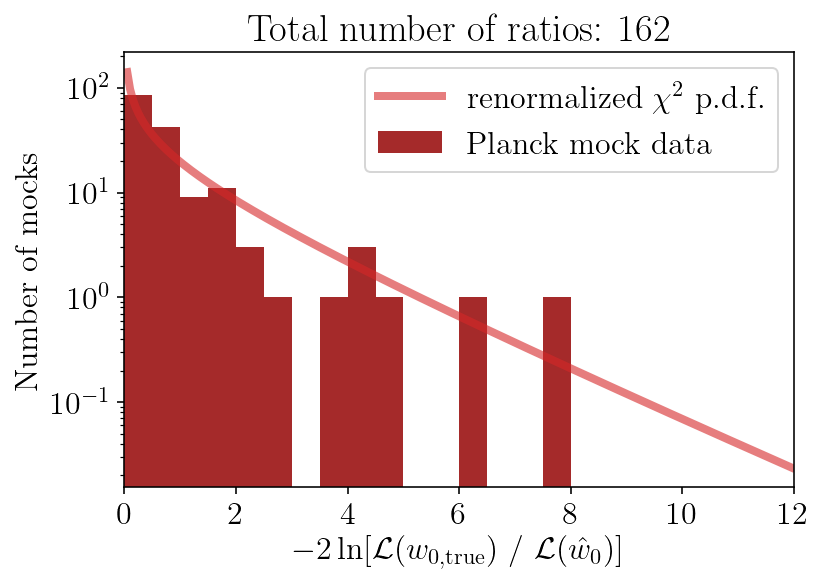

In [9]:
# Plot LR histogram log scale
plt.hist(LR, bins=bins, color="brown", label="Planck mock data")
plt.plot(bins_fine, norm*chi2.pdf(bins_fine, df=1), color="tab:red", lw=4, alpha=0.6, label=r'renormalized $\chi^2$ p.d.f.')
plt.xlim([0,bin_max])
plt.xlabel(r"$-2\ln[\mathcal{L}$("+xname_true+r") / $\mathcal{L}$("+xname_hat+r")]")
plt.ylabel("Number of mocks")
plt.yscale("log")
plt.title("Total number of ratios: "+str(N_LR))
plt.legend()
plt.savefig("LR_hist_0.67_log.pdf", format="PDF")

In [10]:
# Find \Delta\chi^2 for which 68% of mocks are below
LR_cutoff = 0.685
print(100*np.count_nonzero(LR<LR_cutoff)/len(LR), "% of mocks below: ", LR_cutoff)

68.51851851851852 % of mocks below:  0.685


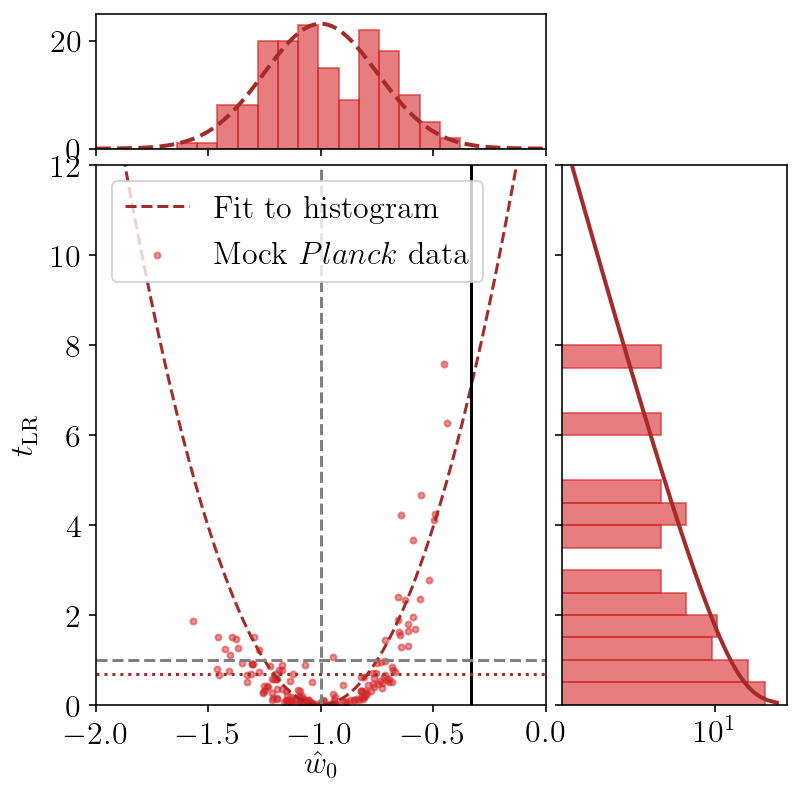

In [11]:
#### LR triangle plot
# Initialise plot
fig = plt.figure(figsize=(6, 6))
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 2), height_ratios=(1, 4), left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.05, hspace=0.05)
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)

std = np.std(x_hat)
mean = np.mean(x_hat)
xlim = 4*std

# Center plot
ax.scatter(x_hat, LR, color="tab:red", marker=".", alpha=0.5, label=r"Mock ${Planck}$ data")
ax.plot(x_bins_fine, (x_bins_fine-x_true)**2/std**2, color='brown', ls='--', label="Fit to histogram")
ax.axvline(x_true, ls="--", color="grey")
ax.axvline(-0.3333, ls="-", color="black")
ax.axhline(LR_cutoff, ls=":", color="brown")
ax.axhline(1, ls="--", color="grey")
ax.set_ylim([0,bin_max])
ax.set_xlim([-2, 0])
ax.set_xlabel(xname_hat)
ax.set_ylabel(r"$t_\mathrm{LR}$")
ax.legend(loc="upper left")

# Hist x
ax_histx.hist(x_hat, bins=x_bins, color='tab:red', alpha=0.6, edgecolor='tab:red')
ax_histx.plot(x_bins_fine, norm_x*Gauss.pdf(x_bins_fine, loc=x_true, scale=std), color='brown', lw=2, ls="--")
ax_histx.set_ylim(0,25)

# Hist y
ax_histy.hist(LR, bins=bins, orientation='horizontal', color='tab:red', alpha=0.6, edgecolor='tab:red')
ax_histy.plot(norm*chi2.pdf(bins_fine, df=1), bins_fine, color='brown', lw=2)
ax_histy.set_xscale("log")

plt.savefig("LR_hist_varying_NP_w0.pdf", format="PDF", bbox_inches='tight')
plt.show()

In [12]:
# Find \Delta\chi^2 for which 95% of mocks are below
LR_cutoff = 2.1
print(100*np.count_nonzero(LR<LR_cutoff)/len(LR), "% of mocks below: ", LR_cutoff)

93.20987654320987 % of mocks below:  2.1


In [13]:
# Compare sigma_asimov and sigma_mocks:
print("sigma_mocks: ", np.std(x_hat))

sigma_mocks:  0.2513702212250784
